# 12-752: Data-Driven Building Energy Management
## Spring 2020, Carnegie Mellon University

## Assignment \#1



### Task 1 [0%]: Making sure everything is installed correctly
Please double click the code cell below and click 'Cell' -> 'Run Cells' in the drop-down bar above, or if you prefer to use the keyboard, hit Shift + Enter to run the selected cell.

You should get an output similar to this (the version numbers should be the same):
```
Python version:
3.7.6 (default, Jan  8 2020, 13:42:34) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
Numpy version:
1.18.1
Sklearn version:
0.22.1
```

In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt

import sys
print('Python version:')
print(sys.version)
print('Numpy version:')
print(np.__version__)
import sklearn
print('Sklearn version:')
print(sklearn.__version__)

Python version:
3.7.6 (default, Jan  8 2020, 13:42:34) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
Numpy version:
1.18.1
Sklearn version:
0.22.1


# Short Introduction to Python and Jupyter

As we discussed in the previous version of this assignment, Jupyter notebooks consist of cells. This cell is a Markdown cell. Try double-clicking this cell. You can write pretty text and even Latex is supported!

Another short Latex example: $x \frac{1+x}{(1-x)^3} = \sum_{n=0}^{\infty}{n^2 x^n}$


### Task \#2 [5%]: Quick exercise
Just like we did in the F17 version of the assignmeent, create a new cell under this cell and change the cell type to 'Markdown'. Now make the cell display the formula for the Fourier transform (https://en.wikipedia.org/wiki/Fourier_transform) in Latex. Do not forget to run the cell you just created.

**From this point on, we will assume that you have gone through Assignment \#1 from Fall 2017 and understand most (if not all) of it.**

### Task \#3 [10%]: Another quick exercise
Create a cell under this. Make sure the type of the cell is 'Code'.
Compute the square root of sum of 1 to 20 and print it to the console. *Hint: you'll need to know about np.sqrt*

In [2]:
np.info(np.sqrt) #This is yet another way of getting information on, in this case, numpy methods/functions

sqrt(x, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])

Return the non-negative square-root of an array, element-wise.

Parameters
----------
x : array_like
    The values whose square-roots are required.
out : ndarray, None, or tuple of ndarray and None, optional
    A location into which the result is stored. If provided, it must have
    a shape that the inputs broadcast to. If not provided or None,
    a freshly-allocated array is returned. A tuple (possible only as a
    keyword argument) must have length equal to the number of outputs.
where : array_like, optional
    This condition is broadcast over the input. At locations where the
    condition is True, the `out` array will be set to the ufunc result.
    Elsewhere, the `out` array will retain its original value.
    Note that if an uninitialized `out` array is created via the default
    ``out=None``, locations within it where the condition is False will
    remain uni

In [3]:
# Your code goes here

14.491376746189438


# Plotting
Jupyer notebooks allow you to interactively explore data. Let's continue with the sine-wave idea, but twist it up a bit.

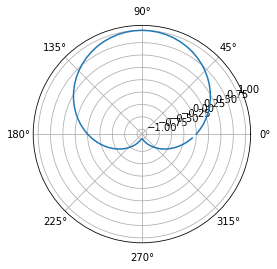

In [4]:
x = np.arange(0, 2*np.pi, 2*np.pi/80.0)
y = np.sin(x)

# Some additional code will generate the plot below

### Task \#4 [10%]: Plotting exercise
Use the matplotlib library to create a polar plot (i.e., using polar coordinates) of three periods of a cosine-wave in the cell below. To be clear, when generating that plot, we are simply assuming that $\theta$ (the angle) is simply the value going into the cosine function, and the radius ($r$) is the cosine of that value.  Also, add a title to your plot. You can name labels and title whatever you want. *Hint: plt.title will be your friend*.

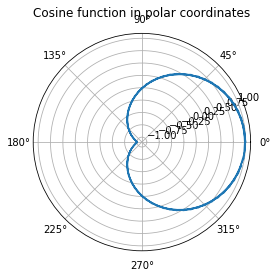

In [5]:
# Your code goes here

# Data structures

## Quick exercises:
In the cell below, complete the following tasks:

### Task \#5 [10%]: Using for-loops to construct the following pattern, using a nested for loop. 

(*Hints: if a loop exists inside the body of another loop, it's called nested loop; the pirint function ends with a new line by default, but you can print without a newline, see https://www.geeksforgeeks.org/gfact-50-python-end-parameter-in-print/*)

                        * 
                        * *
                        * * * 
                        * * * * 
                        * * * * * 
                        * * * * * *
                        * * * * * 
                        * * * * 
                        * * * 
                        * * 
                        *
                        

In [6]:
# Your code goes here


* 
* * 
* * * 
* * * * 
* * * * * 
* * * * * * 
* * * * * 
* * * * 
* * * 
* * 
* 


# Handling data with GNU Utilities on a Linux server.

Chances are that the computers you will be using to run your code will be accessible only remotely and through a command line interface (a shell). Thus, instead of simply dealing with datasets on your local computer, like we did in the F17 version of this assignment, let's try to do manipulate the dataset on a linux server using solely GNU utilities that are pretty good at this.

To start, please find a suitable SSH Client for your operating system. My suggestions are:

* Microsoft Windows: [PuTTY](https://www.chiark.greenend.org.uk/~sgtatham/putty/latest.html)
* MacOS: OpenSSH Client (which [comes with the OS](https://osxdaily.com/2017/04/28/howto-ssh-client-mac/))
* Linux: OpenSSH Client (which also [comes with most linux distributions](https://man.openbsd.org/ssh.1))

Once you have that installed, then from a terminal (not from within this Jupyter Notebook) issue the following command (making sure to substitute AndrewID for your actual Andrew ID):

```
ssh AndrewID@unix.andrew.cmu.edu
```

If this works, you will be asked for your AndrewID password and then you will be connected to a linux server on CMU campus, available for all faculty and students. Your process should look something like this:

```
21:54 1> ssh yourandrewid@unix.andrew.cmu.edu
yourandrewid@unix.andrew.cmu.edu's password:
Last login: Mon Mar 23 21:11:42 2020 from pool-118-17-91-213.pitbpa.fios.verizon.net
		Welcome to the Carnegie Mellon University
			Linux timeshare pool

		now running Red Hat Enterprise Linux 7

These machines are a shared resource. Please be considerate of other users.

Please note: These machines reboot nightly.

You are using 60% (1.1G) of your 1.9G AFS quota.
Exceeding your AFS quota will result in failed logins to the Linux workstations in computer labs.

[yourandrewid@unix5 ~]$
```

If that worked for you: congratulations, now you have access to a linux server from anywhere in the world. This becomes especially useful if you are not running a unix-like operating system (e.g., if you are running Microsoft Windows).

From here on, however, you can decide whether to run the rest of the commands from within ```unix.andrew.cmu.edu``` or from your computer, so long as your operating system has access to all of the GNU utilities we are going to be making use of.

## Cloning a repository

### Task 6: Clone our course's git repository [20%]

In the cell below, using either the "!" or "%bash" functionality of Jupyter Notebooks, issue a shell command to the git client so that you can clone the course's repository (https://github.com/marioberges/S20-12-752.git).

*(I realize that many of you may have already cloned the repository and that is how you got access to this notebook. That said, not all of you will have done that, so please repeat the process here anyway)*

In [7]:
# Your code goes here

Cloning into 'S20-12-752'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 12 (delta 0), reused 9 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), 175.47 KiB | 4.18 MiB/s, done.


## Extract useful information out of the testdata.txt

### Task 7: Navigate to the folder with the file [10%]

Now that we have cloned the repository, navigate to the directory where the dataset in question lives (we're talking about the ```testdata.txt``` file that was used in the F17 version of this course. Use the ```cd``` (change directory) command to navigate there. Here, however, you will need to be cautios about your use of "!" to change directory. Let's first figure out which directory we are in (i.e., the **p**resent **w**orking **d**irectory).

In [8]:
%pwd

'/Users/mberges/Documents/courses/2020/Spring/12-752/assignments/1'

In [9]:
# your Jupyter Notebook shell call goes here

/Users/mberges/Documents/courses/2020/Spring/12-752/assignments/1/S20-12-752/assignments/1


And whatever you did in the cell above should have resulted in a new pwd, going directly into the cloned repositry as below:

In [10]:
%pwd

'/Users/mberges/Documents/courses/2020/Spring/12-752/assignments/1/S20-12-752/assignments/1'

### Task 8: Using the word count utility ```wc``` count the number of lines that the file has [5%]

In [11]:
!man wc


WC(1)                     BSD General Commands Manual                    WC(1)

NNAAMMEE
     wwcc -- word, line, character, and byte count

SSYYNNOOPPSSIISS
     wwcc [--ccllmmww] [_f_i_l_e _._._.]

DDEESSCCRRIIPPTTIIOONN
     The wwcc utility displays the number of lines, words, and bytes contained
     in each input _f_i_l_e, or standard input (if no file is specified) to the
     standard output.  A line is defined as a string of characters delimited
     by a <newline> character.  Characters beyond the final <newline> charac-
     ter will not be included in the line count.

     A word is defined as a string of characters delimited by white space
     characters.  White space characters are the set of characters for which
     the iswspace(3) function returns true.  If more than one input file is
     specified, a line of cumulative counts for all the files is displayed on
     a separate line after the output for the last file.

    

In [12]:
# Your code goes here

     200 testdata.txt


### Task 9: Using the ```head``` comand, list the first two rows of the file [5%]

In [13]:
!man head


HEAD(1)                   BSD General Commands Manual                  HEAD(1)

NNAAMMEE
     hheeaadd -- display first lines of a file

SSYYNNOOPPSSIISS
     hheeaadd [--nn _c_o_u_n_t | --cc _b_y_t_e_s] [_f_i_l_e _._._.]

DDEESSCCRRIIPPTTIIOONN
     This filter displays the first _c_o_u_n_t lines or _b_y_t_e_s of each of the speci-
     fied files, or of the standard input if no files are specified.  If _c_o_u_n_t
     is omitted it defaults to 10.

     If more than a single file is specified, each file is preceded by a
     header consisting of the string ``==> XXX <=='' where ``XXX'' is the name
     of the file.

EEXXIITT SSTTAATTUUSS
     The hheeaadd utility exits 0 on success, and >0 if an error occurs.

SSEEEE AALLSSOO
     tail(1)

HHIISSTTOORRYY
     The hheeaadd command appeared in PWB UNIX.

BSD                              June 6, 1993                              BSD


In [14]:
# Your code goes here

4.365597071152245157e+00,4.880347017198527482e+00,5.169525004828095405e+00,5.266681718575210169e+00,5.382485434295041671e+00,5.357626899471115145e+00,5.720864463009703194e+00,6.093395020142804874e+00,5.936446149755028046e+00,6.076836262447884884e+00,5.613077960868746885e+00,5.267872692870751550e+00,5.389090171332224344e+00,5.053303474564257769e+00,4.671061649935541737e+00,4.593510874192727300e+00,5.617595853364431235e+00,7.473292676877001384e+00,9.528141163731076446e+00,1.155022081215454222e+01,1.267533313218382851e+01,1.250307859552625267e+01,1.125387588943433670e+01,8.687826799196354699e+00,5.154046135764547287e+00,2.266509819322518826e+00,-6.799372160040714763e-02,-1.981484692265136571e+00,-2.686450795840678030e+00,-3.573114851592795294e+00,-3.990300565975834157e+00,-3.843582634955709842e+00,-3.827073328936536178e+00,-3.658077867158995744e+00,-3.445696874233995732e+00,-3.173952744646087343e+00,-2.999918949687721881e+00,-3.042280535017492404e+00,-3.344106957708898875e+00,-3.828143963

### Task 10: Using the ```cut``` comand, list the second and fourth columns of the file [5%]

In [15]:
!man cut


CUT(1)                    BSD General Commands Manual                   CUT(1)

NAME
     cut -- cut out selected portions of each line of a file

SYNOPSIS
     cut -b list [-n] [file ...]
     cut -c list [file ...]
     cut -f list [-d delim] [-s] [file ...]

DESCRIPTION
     The cut utility cuts out selected portions of each line (as specified by
     list) from each file and writes them to the standard output.  If no file
     arguments are specified, or a file argument is a single dash (`-'), cut
     reads from the standard input.  The items specified by list can be in
     terms of column position or in terms of fields delimited by a special
     character.  Column numbering starts from 1.

     The list option argument is a comma or whitespace separated set of num-
     bers and/or number ranges.  Number ranges consist of a number, a dash
     (`-'), and a second number and select the fields or columns from the
     first number to the second, inclusive.  Numbers or number ran

In [16]:
# Your code goes here

4.880347017198527482e+00,5.266681718575210169e+00
4.886360652937674409e+00,5.252187928071226253e+00
4.869635507273115671e+00,5.265892101403420789e+00
4.813981122124091350e+00,5.214981864371941001e+00
4.793573898644201137e+00,5.193265535334289140e+00
4.805197720938985562e+00,5.219410571601899029e+00
4.786839134875097379e+00,5.157330080376579140e+00
4.772387460018346239e+00,5.177712208568938657e+00
4.793746536711235962e+00,5.186731565627851204e+00
4.834809265013205071e+00,5.197524341942725279e+00
4.808726250813616154e+00,5.228786084290451441e+00
4.769585197015032030e+00,5.207588362846578001e+00
4.790323711523382322e+00,5.225140903500594902e+00
4.766152397281446795e+00,5.240928609861260412e+00
4.704278480509443305e+00,5.168280986768428065e+00
4.717420376058567122e+00,5.195667801182412227e+00
4.716012500901714866e+00,5.184121910281019652e+00
4.725811980370480114e+00,5.214398127236063551e+00
4.746969764572969375e+00,5.166732661403280247e+00
4.825823193375117448e+00,5.190661763969621312e+00


### Task 10: Combine ```head``` and ```cut``` to show the first two lines of the second and fourth columns of the dataset [5%]

*Hint: you can combine them using pipes. See, for example, [here](https://docs.ycrc.yale.edu/PIL/04-pipefilter/).*

In [17]:
# Your code goes here

4.880347017198527482e+00,5.266681718575210169e+00
4.886360652937674409e+00,5.252187928071226253e+00


## Data Normalization:

Assume you have a dataset X, which has N rows (entries) and D columns (features). X[:,i] represents feature i and X[j,:] represent entry j. We define Min-Max Normalization as 

$~ ~ X[:, i] = \frac{X[:, i] - \min(X[i, :])}{\max(X[:, i]) - \min(X[i, :])}$

Let's start with the same dataset we had in the F17 version of this assignment, and import it in the same way we had done then

In [18]:
f = open('testdata.txt')
parsed_lines = []
for line in f:
    l = line.split(',') #create a list by splitting the string line at every ','
    l = [float(x) for x in l] #in-line for-loop that casts strings to floats
    parsed_lines.append(l)

data_matrix = np.array(parsed_lines)

In [19]:
print(data_matrix.shape) #shows the dimensions of the data_matrix, 200 rows, 80 columns

(200, 80)


### Task \#12 [15%]:  Apply Min-Max normalization on data_matrix we defined before and print the 6 first columns of the 10 first rows of data_matrix after normalization.

In [20]:
# Your code goes here

[[0.99283794 0.98269138 1.         1.         1.         0.95487074]
 [1.         1.         0.92989441 0.96159742 0.96457645 0.95231143]
 [0.88047746 0.9518612  0.87805896 0.99790784 0.90424263 0.9551236 ]
 [0.88160478 0.79167514 0.83789637 0.86301667 0.87538903 0.88258368]
 [0.69003306 0.73293848 0.7632447  0.80547734 0.84054173 0.72116025]
 [0.71165452 0.7663945  0.70827424 0.87475092 0.79952669 0.85421973]
 [0.55972816 0.71355429 0.77324276 0.71026318 0.86449079 0.60376323]
 [0.88458512 0.67195906 0.74870268 0.76426743 0.79660415 0.72648371]
 [0.86234493 0.73343537 0.6543019  0.78816501 0.71423329 0.82263861]
 [0.8056256  0.8516233  0.65899653 0.81676143 0.76739207 0.8564889 ]]


# DON'T FORGET: Save the Jupyter notebook as a Notebook (.ipynb) and submit it via Canvas.